In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
#generators
trian_dataset=keras.utils.image_dataset_from_directory(
directory='train',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)
test_dataset=keras.utils.image_dataset_from_directory(
directory='test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
type(trian_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [5]:
#normalize the data
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

trian_dataset=trian_dataset.map(process)
test_dataset=test_dataset.map(process)

In [19]:
from keras.layers import BatchNormalization,Dropout

In [6]:
#3 layered cnn

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
si=model.fit(trian_dataset,epochs=5,validation_data=test_dataset)
si

Epoch 1/5
625/625 [==============================] - 2898s 5s/step - loss: 0.6138 - accuracy: 0.6561 - val_loss: 0.5240 - val_accuracy: 0.7432
Epoch 2/5
625/625 [==============================] - 2764s 4s/step - loss: 0.4889 - accuracy: 0.7616 - val_loss: 0.4774 - val_accuracy: 0.7768
Epoch 3/5
625/625 [==============================] - 2308s 4s/step - loss: 0.3860 - accuracy: 0.8264 - val_loss: 0.5118 - val_accuracy: 0.7730
Epoch 4/5
625/625 [==============================] - 2836s 5s/step - loss: 0.2600 - accuracy: 0.8895 - val_loss: 0.5985 - val_accuracy: 0.7996
Epoch 5/5
625/625 [==============================] - 2558s 4s/step - loss: 0.1386 - accuracy: 0.9438 - val_loss: 0.8757 - val_accuracy: 0.7956


In [10]:
si

In [11]:
si.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import matplotlib.pyplot as plt

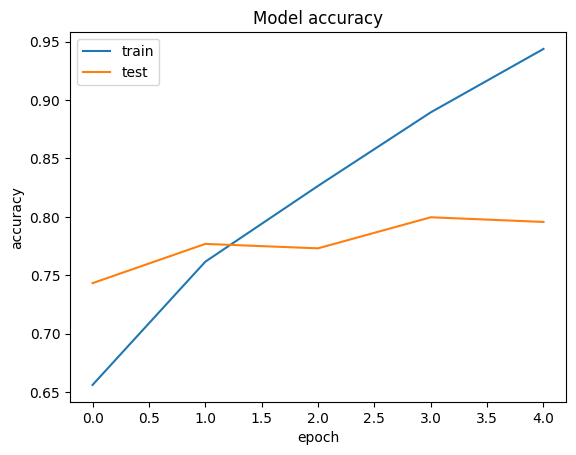

In [15]:
#summarize history for accuracy
plt.plot(si.history['accuracy'])
plt.plot(si.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

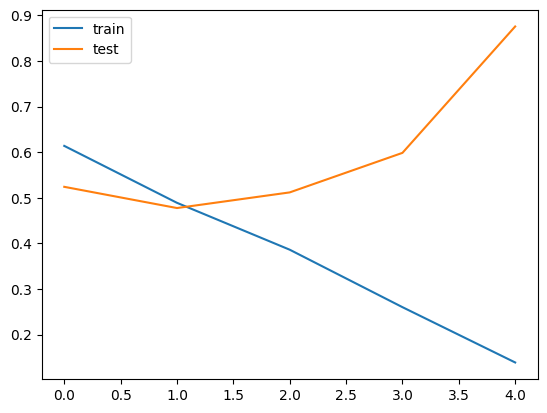

In [16]:
plt.plot(si.history['loss'])
plt.plot(si.history['val_loss'])
plt.legend(['train','test'])
plt.show()

In [17]:
#looks like overfitting model

In [18]:
#sterps to reduce overfitting

#1.add more data
#2.data augmenatation
#3.l1/l2 regularization
#3.Dropout
#4.Reduce complexity

In [152]:
si

In [155]:
from tensorflow.keras.models import load_model
model.save('dog vs catclassifiacation.h5')

In [161]:
import cv2

In [184]:
test_img=cv2.imread('cat.86.jpg')

In [185]:
test_img

array([[[133, 146, 144],
        [133, 146, 144],
        [133, 146, 144],
        ...,
        [118, 136, 137],
        [118, 135, 138],
        [118, 135, 138]],

       [[133, 146, 144],
        [133, 146, 144],
        [133, 146, 144],
        ...,
        [118, 136, 137],
        [118, 135, 138],
        [118, 135, 138]],

       [[133, 146, 144],
        [133, 146, 144],
        [133, 146, 144],
        ...,
        [118, 136, 137],
        [118, 135, 138],
        [118, 135, 138]],

       ...,

       [[ 14,  19,  18],
        [ 14,  19,  18],
        [ 15,  20,  19],
        ...,
        [ 26,  34,  41],
        [ 24,  34,  41],
        [ 24,  34,  41]],

       [[ 14,  19,  18],
        [ 14,  19,  18],
        [ 15,  20,  19],
        ...,
        [ 27,  35,  42],
        [ 25,  35,  42],
        [ 25,  35,  42]],

       [[ 14,  19,  18],
        [ 14,  19,  18],
        [ 15,  20,  19],
        ...,
        [ 28,  36,  43],
        [ 26,  36,  43],
        [ 26,  36,  43]]

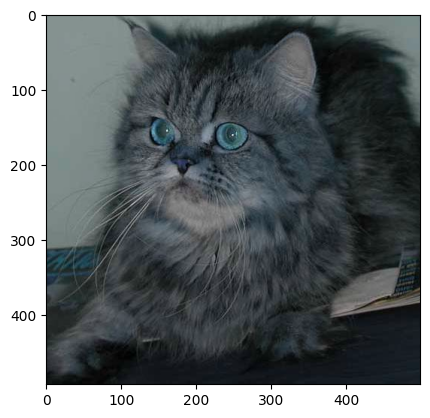

In [186]:
plt.imshow(test_img)

In [187]:
test_img.shape

(493, 499, 3)

In [188]:
test_img=cv2.resize(test_img,(256,256))

In [189]:
test_img=test_img/255

In [190]:
test_input=test_img.reshape((1,256,256,3))

In [191]:
model.predict(test_input)

1/1 [==============================] - 0s 56ms/step


array([[0.00889809]], dtype=float32)

In [192]:
test_input.shape

(1, 256, 256, 3)

In [193]:
import numpy as np

In [194]:
print(model.predict(test_input))

1/1 [==============================] - 0s 72ms/step
[[0.00889809]]


In [195]:
y=model.predict(test_input)

1/1 [==============================] - 0s 72ms/step


In [196]:
result = model.predict(test_input)
result = result.flatten()
result = round(result[0])

1/1 [==============================] - 0s 56ms/step


In [197]:
print(result)

0
